# Data Visualization
## Two type of libraries used for plotting in python
- Matplotlib
- Seaborn
## Type of visualisation according to data:
- univarite
- bivariate
### univariate: 
- histogram(designed using range of value int)
- Bar chart(string value)
### bivariate: 
- scatter plot(2 int value plot): a line is made using the scattered data to take decision
- Box plot(string and int): calculate median using the percentile value
### more than 2 variate:
- Machine leanring used to plot the visualisation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline #used to display graph 

In [3]:
housing = pd.read_csv("housing_prices.csv")

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Exploratory Analysis

### Univariate

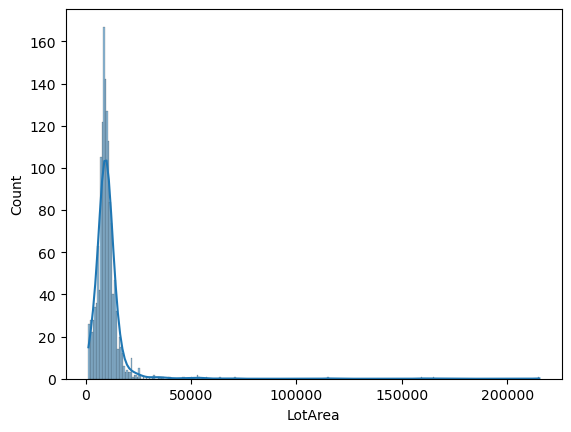

In [10]:
# Analyze the spread of the "LotArea" column
# distplot: histogram

sns.histplot(housing["LotArea"], kde=True);
#kde: kernel density estimate: try to fit all the point in graph together, such that sum of all is 1 if kept as True
# outlier data: data far maximum dara, in some ML cases these type of data is removed

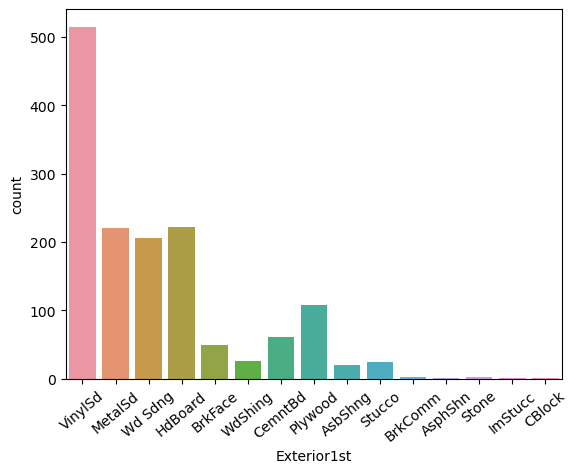

In [13]:
# What are the different types of housing exterios
# bar graph

plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40); 
# used to fit the labels of x-axis such that it is readable

### Bi-variate Analysis

<b> Q: Does the price of the house depend on the lot area? </b>

<Axes: xlabel='LotArea', ylabel='SalePrice'>

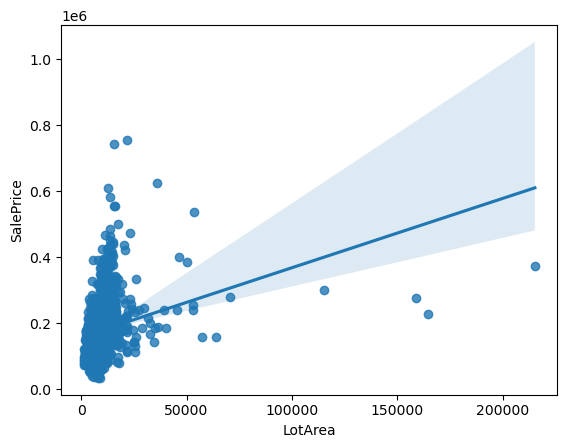

In [14]:
#scatter plot
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)

In [15]:
# Are outliers skewing the relationship.. Redraw the relationshp after removing very large values
housing["LotArea"].quantile([0.5,0.95,0.99])
# in quantile we specify the percentile value(median value: 0.5 middle value,0.95 95th value, 0.99 99th value when arrange in ascending order) need to be calculated in order to find the outliers for a particular column
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

<Axes: xlabel='LotArea', ylabel='SalePrice'>

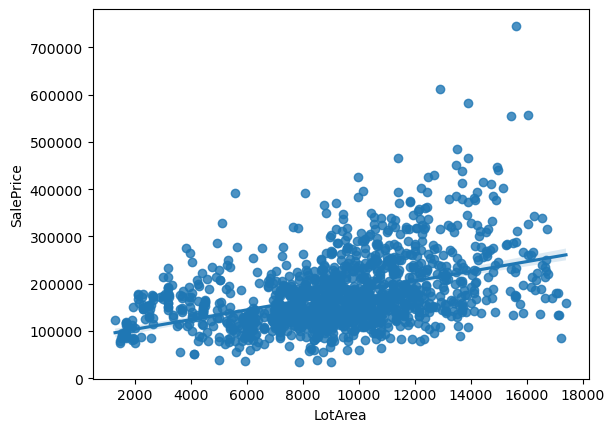

In [16]:
#remove outlier
sns.regplot(x = "LotArea", y = "SalePrice", data = housing_sub)



In [27]:
housing["LotArea"].corr(housing["SalePrice"])
housing_sub["LotArea"].corr(housing_sub["SalePrice"])

0.2638433538714056

0.4302099912897768

### Plotting multiple graphs
<b> Q: Analyze the relationship between SalesPrice and all "Square Feet (SF)" related columns </b>

In [19]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]
sf_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [18]:
len(sf_cols)

9

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


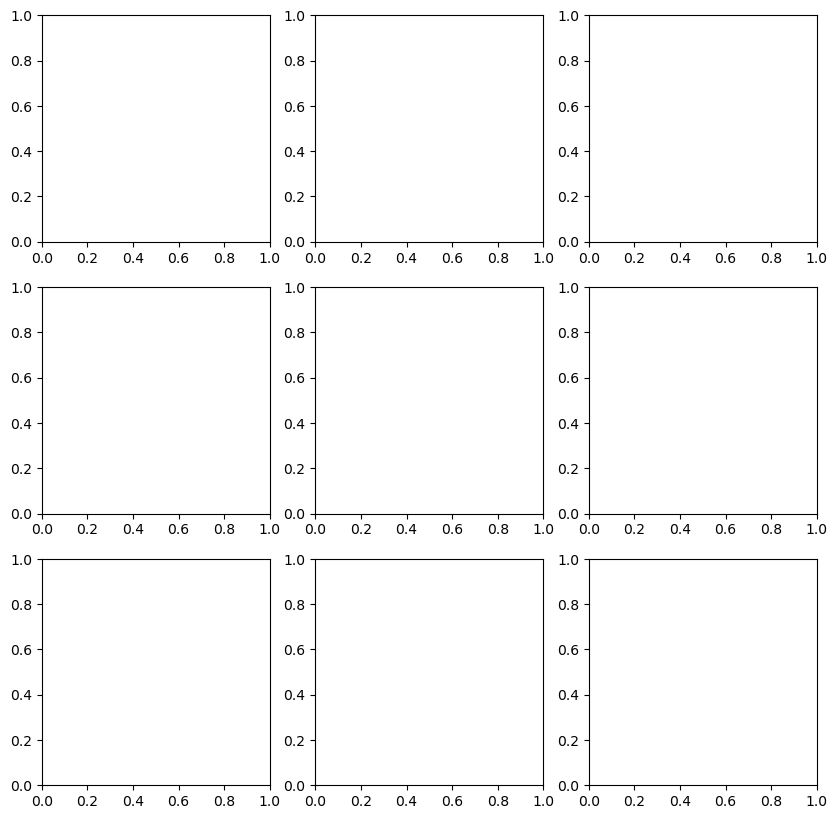

In [22]:
fig, axs = plt.subplots(nrows=3,ncols = 3, figsize =(10,10))
# get the index position of each graph
for i in range(0, len(sf_cols)):
    rows=i//3
    cols=i%3
    print(rows,cols)

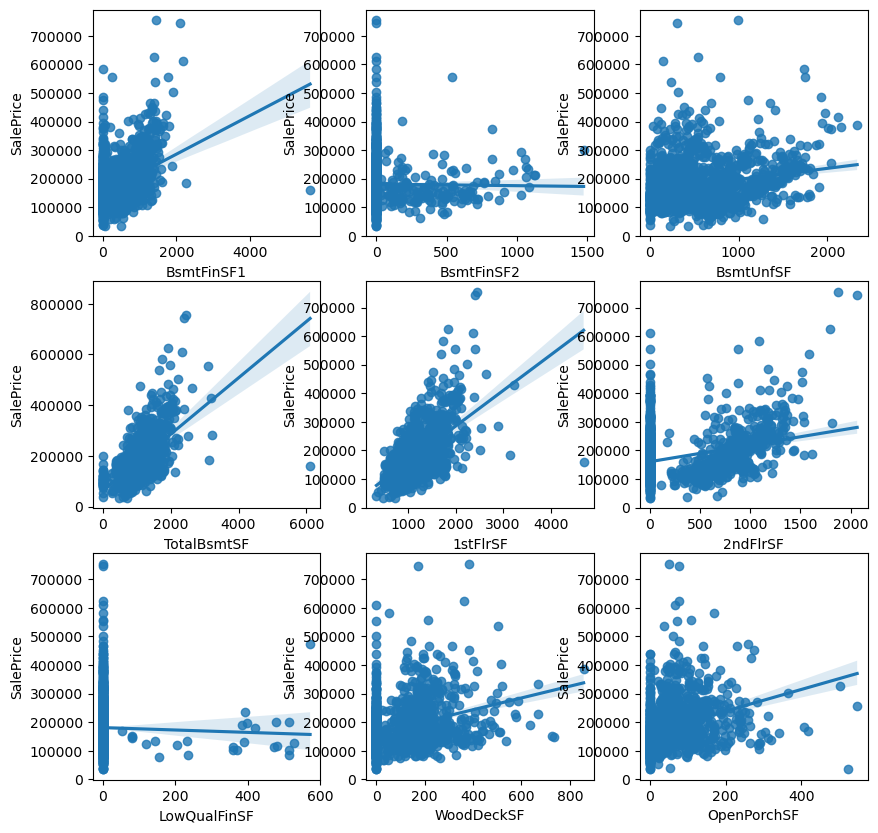

In [23]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0, len(sf_cols)):
    rows = i // 3
    cols = i % 3
    ax = axs[rows, cols]
    plot = sns.regplot(x = sf_cols[i], y = "SalePrice", data = housing, ax=ax)

In [24]:
### Is the price of the house impacted by the Exterior covering on house
housing["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

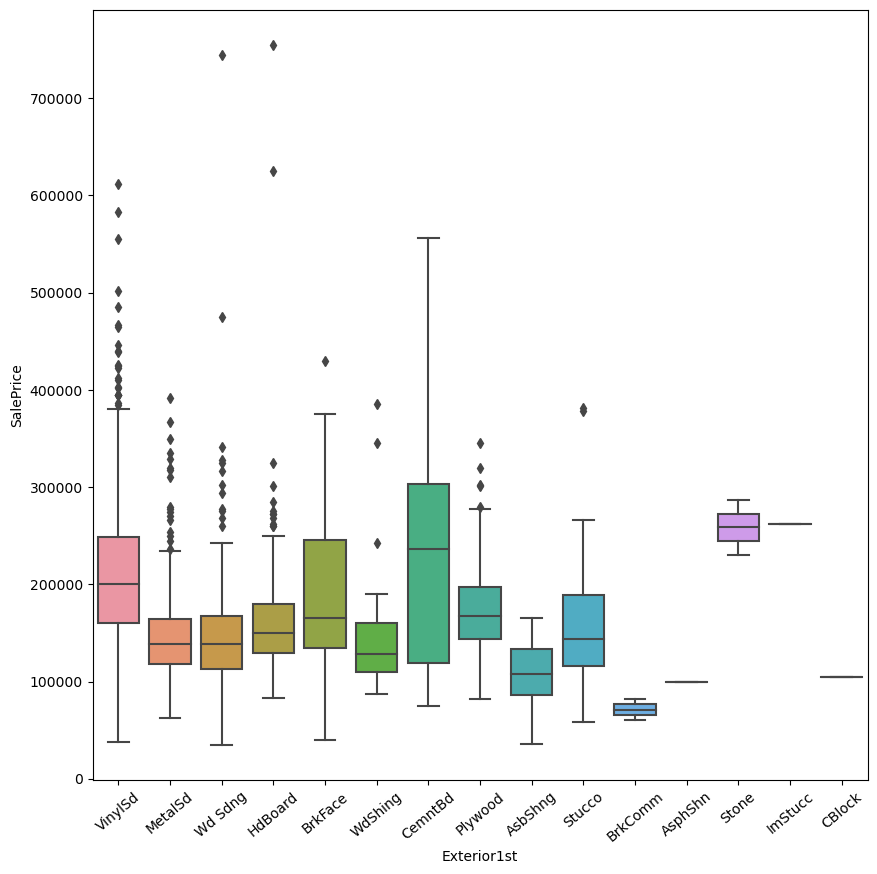

In [26]:
fig, axs = plt.subplots(figsize = (10,10))
plot = sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax=axs);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40); #setting the x label in readable position

<b>Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

a) Create a new column - <i>"Exterior_New"</i> with only the top 3 values of Exterior in it. All other values are converted to "Others"

b) Plot the relationship between Sales price and this new columns

<b>Q2: Does the relationship between House exterior and Price change depending on how old the house is. For this question simply categorize houses into Old and New based on the condition: YearBuilt > 2000 "New" else "Old"</b>

<b> Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

In [30]:
top_3_exterior = housing["Exterior1st"].value_counts().head(3)
top_3_exterior

VinylSd    515
HdBoard    222
MetalSd    220
Name: Exterior1st, dtype: int64

In [31]:
top_3_exterior = list(top_3_exterior.index)
top_3_exterior

['VinylSd', 'HdBoard', 'MetalSd']

In [32]:
housing["Exterior_new"] = np.where(housing["Exterior1st"].isin(top_3_exterior),housing["Exterior1st"],"Others")
housing["Exterior_new"]

0       VinylSd
1       MetalSd
2       VinylSd
3        Others
4       VinylSd
         ...   
1455    VinylSd
1456     Others
1457     Others
1458    MetalSd
1459    HdBoard
Name: Exterior_new, Length: 1460, dtype: object

In [33]:
housing["Exterior_new"].value_counts()

VinylSd    515
Others     503
HdBoard    222
MetalSd    220
Name: Exterior_new, dtype: int64

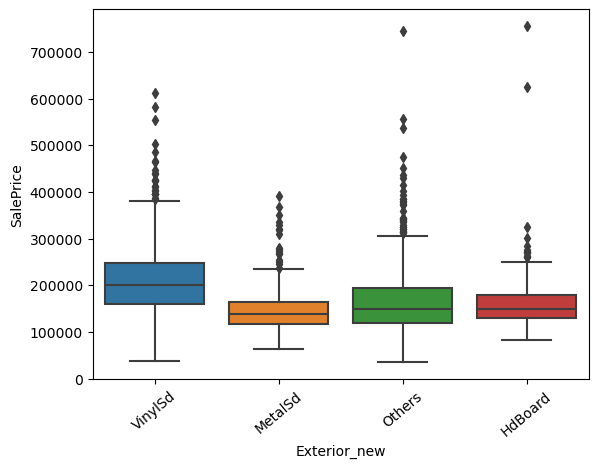

In [34]:
plot = sns.boxplot(x = "Exterior_new", y = "SalePrice", data = housing);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<b> Does the relationship between House exterior and Price change depending on how old the house is </b>

In [35]:
housing["new_house"] = np.where(housing["YearBuilt"] > 2000,"New","Old")
housing["new_house"]

0       New
1       Old
2       New
3       Old
4       Old
       ... 
1455    Old
1456    Old
1457    Old
1458    Old
1459    Old
Name: new_house, Length: 1460, dtype: object

In [36]:
housing["new_house"].value_counts()

Old    1096
New     364
Name: new_house, dtype: int64

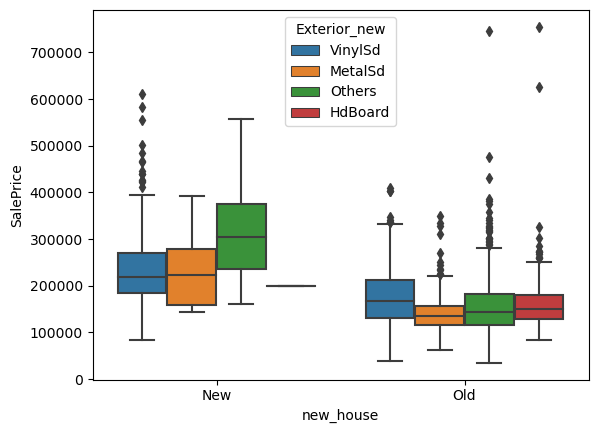

In [37]:
sns.boxplot(x = "new_house", y = "SalePrice", hue = "Exterior_new", data = housing);

In [38]:
housing.groupby(["Exterior_new","new_house"]).agg({"SalePrice":["count", "median"]})

SalePrice          
                           count    median
Exterior_new new_house                    
HdBoard      New               1  198500.0
             Old             221  149900.0
MetalSd      New              19  222000.0
             Old             201  135000.0
Others       New              35  303477.0
             Old             468  142976.5
VinylSd      New             309  219500.0
             Old             206  167075.0

<b> Has the type of exterior changed for newer homes compared to older houses </b>



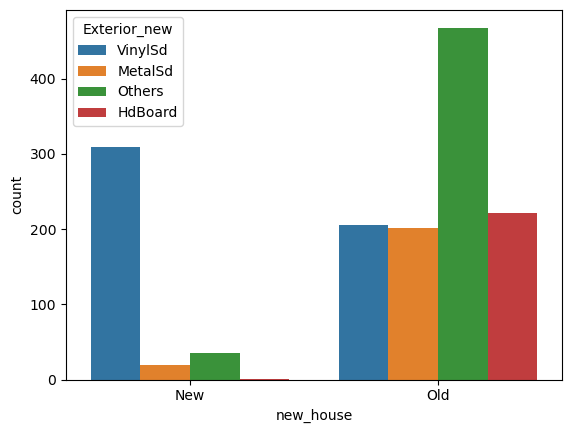

In [39]:
sns.countplot(x = "new_house", data = housing, hue = "Exterior_new");